## Metric: Which neighborhood will burn down the slowest
We measured this through number of city-owned properties per acre in the neighborhood

In [13]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
#read in datasets
buildings = pd.read_csv("Properties.csv")
neighborhoods = pd.read_csv("Neighborhoods.csv")

In [2]:
#use the iloc function to get the columns of information I need
neighborhoodsAcres = neighborhoods.iloc[:, [22]]
nName = neighborhoods.iloc[:, [20]]
bName = buildings.iloc[:, 5]
bName = bName.dropna()

In [3]:
#add all the neighborhoods to a list
neighborhoodList = []
for num in range(0, len(nName)):
    n = nName.iat[num, 0]
    neighborhoodList.append(n)

In [4]:
#create a dictionary of all city-owned buildings in specific neighborhoods
buildDictionary = {}
for num in range(0, len(bName)):
    b = bName.iloc[num]
    if b in neighborhoodList:
        if not b in buildDictionary.keys():
            buildDictionary[b] = 1
        else:
            buildDictionary[b] += 1

<BarContainer object of 82 artists>

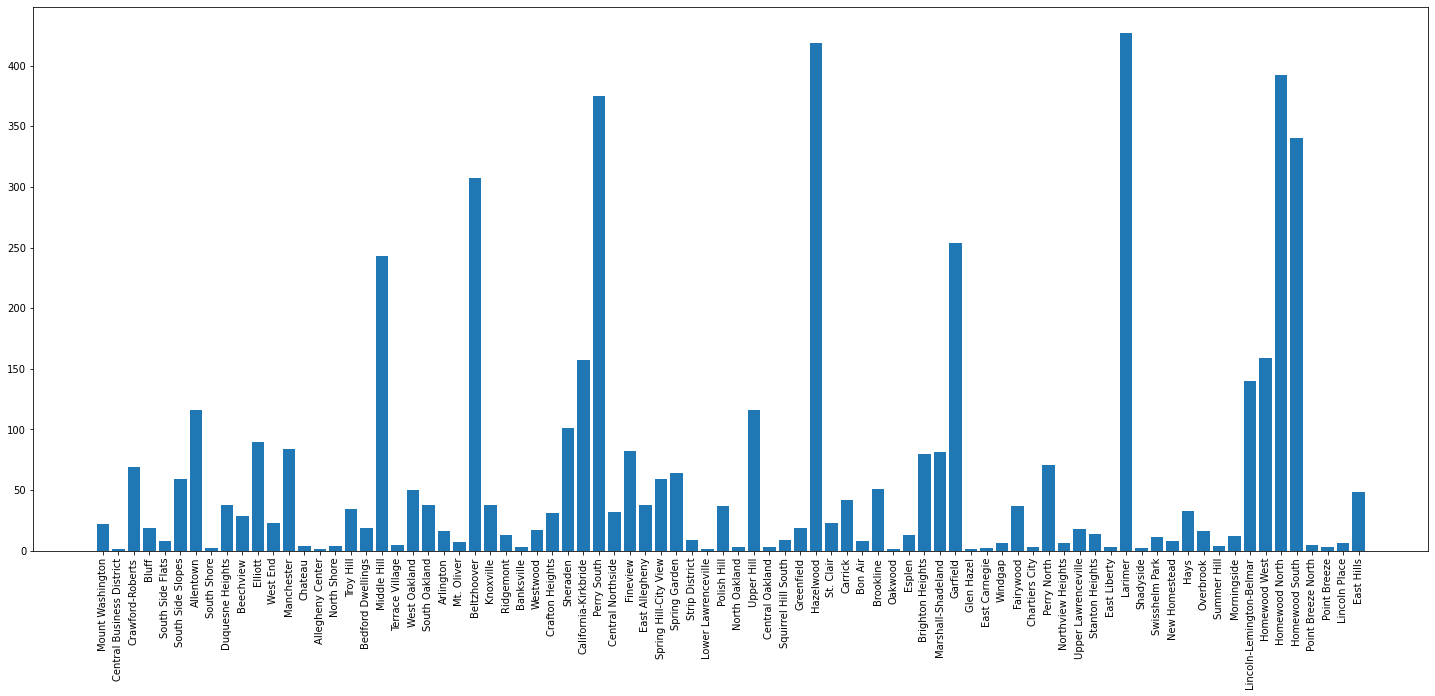

In [5]:
#create a bar graph for all the city-owned buildings
keys = buildDictionary.keys()
values = []
for key in buildDictionary.keys():
    values.append(buildDictionary[key])
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)
plt.bar(keys, values)

In [6]:
#create a dictionary to calculate the city-owned buildings per acre in each neighborhood
averageDictionary = {}
for num in range(0, len(nName)):
    n = nName.iat[num, 0]
    a = neighborhoodsAcres.iat[num, 0]
    if n in buildDictionary.keys() and a > 0:
        b = buildDictionary[n]
        averageDictionary[n] = a/b

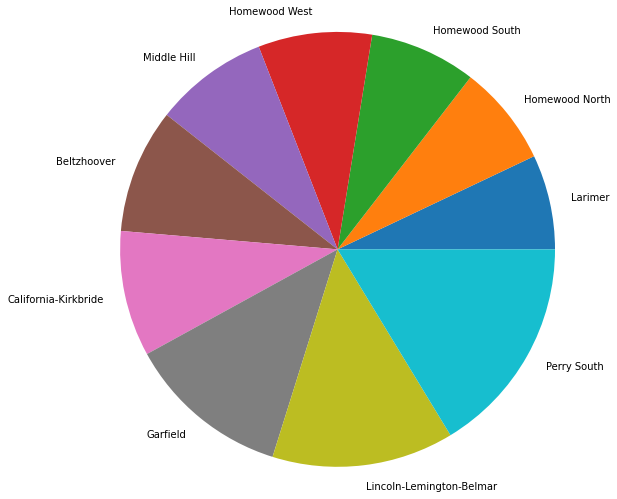

In [25]:
#create a pie chart of the top 10 from the dictionary above
avg = []
#based on code from https://www.geeksforgeeks.org/python-n-largest-values-in-dictionary/
myLabels = nsmallest(10, averageDictionary, key = averageDictionary.get)
for key in myLabels:
    avg.append(averageDictionary[key])
p = np.array(avg)
plt.pie(p, radius = 2.5, labels = myLabels)
plt.show()

<p> This pie chart displays the 10 neighborhoods with the lowest number of buildings per acre. For our purposes, the slices of the chart with the smaller areas would be better than the slices with larger areas.

In [23]:
#display the neighborhood with the lowest buildings per acre
minimum = float("inf")
k = ""
for key in averageDictionary.keys():
    if averageDictionary[key] < minimum:
        minimum = averageDictionary[key]
        k = key
print("The neighborhood with the lowest city-owned buildings per acre is " + k + " with " 
      + str(minimum) + " buildings per acre")

The neighborhood with the lowest city-owned buildings per acre is Larimer with 0.6701639344262296 buildings per acre


# Conclusion
<p>Larimer is the best neighborhood to live in based on this metric because it has the lowest buildings per acre in the neighborhood, meaning the buildings are more spread out than other neighborhoods. This means that the Larimer will burn down the slowest amongst all the neighborhoods.